### Project Team Id : PTID-CDS-MAR-24-1838 
### Project Code     : PRCP-1020-HousePricePred
### Project Name    : House Price Prediction - Advanced Regression

  

# Business Case :-  Based on the given features we have to predict the price of house.

# Problem Statement

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:-a) Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.      
            b) Determine the relationship between the house features and how the price varies based on this.

Task3:- Come up with suggestions for the customer to buy the house according to the area, price and other requirements.




#### Task 1 :- Prepare a complete data analysis report on the given data.

In [1]:
# Importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
data = pd.read_csv('data.csv')

In [3]:
# Display the data
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Data Information / Domain Analysis

* This data set contains 80 features and Target variable.
* The target variable is SalePrice
* The target variable is continuous in nature i.e. it contains float values. So we use the Regression task.


Attribute Information:

●	SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

●	MSSubClass: The building class

●	MSZoning: The general zoning classification

●	LotFrontage: Linear feet of street connected to property 

●	LotArea: Lot size in square feet

●	Street: Type of road access

●	Alley: Type of alley access

●	LotShape: General shape of property

●	LandContour: Flatness of the property

●	Utilities: Type of utilities available

●	LotConfig: Lot configuration

●	LandSlope: Slope of property

●	Neighborhood: Physical locations within Ames city limits

●	Condition1: Proximity to main road or railroad

●	Condition2: Proximity to main road or railroad (if a second is present)

●	BldgType: Type of dwelling

●	HouseStyle: Style of dwelling

●	OverallQual: Overall material and finish quality

●	OverallCond: Overall condition rating

●	YearBuilt: Original construction date

●	YearRemodAdd: Remodel date

●	RoofStyle: Type of roof

●	RoofMatl: Roof material

●	Exterior1st: Exterior covering on house

●	Exterior2nd: Exterior covering on house (if more than one material)

●	MasVnrType: Masonry veneer type

●	MasVnrArea: Masonry veneer area in square feet

●	ExterQual: Exterior material quality

●	ExterCond: Present condition of the material on the exterior

●	Foundation: Type of foundation

●	BsmtQual: Height of the basement

●	BsmtCond: General condition of the basement

●	BsmtExposure: Walkout or garden level basement walls

●	BsmtFinType1: Quality of basement finished area

●	BsmtFinSF1: Type 1 finished square feet

●	BsmtFinType2: Quality of second finished area (if present)

●	BsmtFinSF2: Type 2 finished square feet

●	BsmtUnfSF: Unfinished square feet of basement area

●	TotalBsmtSF: Total square feet of basement area

●	Heating: Type of heating

●	HeatingQC: Heating quality and condition

●	CentralAir: Central air conditioning

●	Electrical: Electrical system

●	1stFlrSF: First Floor square feet

●	2ndFlrSF: Second floor square feet


●	LowQualFinSF: Low quality finished square feet (all floors)

●	GrLivArea: Above grade (ground) living area square feet

●	BsmtFullBath: Basement full bathrooms

●	BsmtHalfBath: Basement half bathrooms

●	FullBath: Full bathrooms above grade

●	HalfBath: Half baths above grade

●	Bedroom: Number of bedrooms above basement level

●	Kitchen: Number of kitchens

●	KitchenQual: Kitchen quality


●	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

●	Functional: Home functionality rating

●	Fireplaces: Number of fireplaces

●	FireplaceQu: Fireplace quality

●	GarageType: Garage location

●	GarageYrBlt: Year garage was built

●	GarageFinish: Interior finish of the garage

●	GarageCars: Size of garage in car capacity

●	GarageArea: Size of garage in square feet

●	GarageQual: Garage quality

●	GarageCond: Garage condition

●	PavedDrive: Paved driveway

●	WoodDeckSF: Wood deck area in square feet

●	OpenPorchSF: Open porch area in square feet

●	EnclosedPorch: Enclosed porch area in square feet

●	3SsnPorch: Three season porch area in square feet

●	ScreenPorch: Screen porch area in square feet

●	PoolArea: Pool area in square feet

●	PoolQC: Pool quality

●	Fence: Fence quality

●	MiscFeature: Miscellaneous feature not covered in other categories

●	MiscVal: $Value of miscellaneous feature

●	MoSold: Month Sold

●	YrSold: Year Sold

●	SaleType: Type of sale

●	SaleCondition: Condition of sale

* You are required to model the price of houses with the available independent variables. 
* This model will then be used by the management to understand how exactly the prices vary with the variables.
* They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
* Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Basic checks

In [4]:
# Display first five rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Display last five rows
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
# To check the shape of data
data.shape

(1460, 81)

* There are 1460 rows and 81 columns.

In [7]:
# Display the all columns of dataset
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# Display the data types of each column
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
# For the statistical information
data.describe().T

# T refers to transpose that displays the description of our dataset in long format.

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


* .describe() method gives the statistical information of the data.
* count function gives the number of non null values in each columns.
* mean - It gives the average value of each column.
* std - It gives a measure of the dispersion or spread of values in each column.
* min - The smallest value in each column.
* here in this data the minimum value of each column is 0. Only the target column have minimum value 1.
* This data is encoded data.
* 25% - 25th Percentile also known as the first quartile, it represents the value below which 25% of the data falls.
* 50% - 50th Percentile also known as the median, it represents the middle value of the dataset.
* 75% - 75th Percentile also known as the third quartile, it represents the value below which 75% of the data falls.
* max - The largest value in each column.




In [10]:
# Statistical info about target variable
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* Our target feature is a continuous variable with values ranging from 34900 to 755000.
* The average sale price of all the houses in our dataset is 180921.
* Sale Price has a right skewed distribution.
* The median sale price of our dataset is **163000** which is less than the average value i.e because of right skewed distribution.
* We can see some of the houses have sale price more than **4,00,000**.


In [11]:
# for the information of the columns of dtype object
data.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [12]:
# Information of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* In this data there are 1460 entries / rows which are numbering from 0 to 1459
* There are total 81 columns
* In this data there are 3 columns present which are of float64 data type ,35 columns of int64 dtype and 43 columns are of object data type.
* The total memory used by this data is 924.0+ KB.
* There are some columns which have the null values.
* There some columns present which have the large number of null values.
* Here the total numerical features are 38
* And categorical features are 43.
* But if we look closely , we see that some of the data types are incorrect.
* For ex :- MSSubClass,OverallQual and OverallCond should be object data types.
* We see that some of the features having int data type consists of discrete values.
* If the features have discrete values , it's better to change them into categorical variables that will help us in better analysis.

In [13]:
# To change the data type of those columns which are int data type consists of discrete values to catgorical data.

int_to_object = ['MSSubClass','OverallQual','OverallCond','GarageCars']

for feature in int_to_object:
    data[feature] = data[feature].astype(object)
    

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

1)  .unique() method gives the unique values in the column.


2) .value_counts() method gives value count of unique values.

* Check the unique values in categorical columns

In [15]:
data.Id.unique()

array([   1,    2,    3, ..., 1458, 1459, 1460], dtype=int64)

In [16]:
data.value_counts()

Series([], dtype: int64)

In [17]:
data.Id.value_counts().unique()

array([1], dtype=int64)

* In this data the Id column is unique column i.e. all values in this column are unique 
* so we drop the column

In [18]:
# to drop the Id column which is not required.
data.drop(['Id'],axis=1,inplace= True)

In [19]:
# Seperate the numerical and categorical columns 
categorical_columns = data.select_dtypes(include=['object'])
categorical_columns

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,2,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,2,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,2,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,3,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,3,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,RFn,2,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Unf,2,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,70,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,RFn,1,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,1,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [20]:
# for only numerical columns 
numerical_columns = data.select_dtypes(include=['int','float'])
numerical_columns

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,349,0,0,0,0,0,0,2,2010,210000
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,0,60,0,0,0,0,2500,5,2010,266500
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,366,0,112,0,0,0,0,4,2010,142125


* There are 33 numerical columns and 47 categorical columns

In [21]:
 #Dictionary to store unique values for each categorical column
unique_values = {}

# Iterate over each categorical column
for col in categorical_columns:
    unique_values[col] = data[col].unique()

# Print unique values for each categorical column
for col, values in unique_values.items():
    print(f"Unique values in '{col}':")
    print(values)
    print()

Unique values in 'MSSubClass':
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]

Unique values in 'MSZoning':
['RL' 'RM' 'C (all)' 'FV' 'RH']

Unique values in 'Street':
['Pave' 'Grvl']

Unique values in 'Alley':
[nan 'Grvl' 'Pave']

Unique values in 'LotShape':
['Reg' 'IR1' 'IR2' 'IR3']

Unique values in 'LandContour':
['Lvl' 'Bnk' 'Low' 'HLS']

Unique values in 'Utilities':
['AllPub' 'NoSeWa']

Unique values in 'LotConfig':
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Unique values in 'LandSlope':
['Gtl' 'Mod' 'Sev']

Unique values in 'Neighborhood':
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Unique values in 'Condition1':
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Unique values in 'Condition2':
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

U

* It gives the unique values in each categorical column


In [22]:
# Dictionary to store value counts for each categorical column
value_counts = {}

# Iterate over each categorical column
for col in categorical_columns:
    value_counts[col] = data[col].value_counts()

# Print value counts for each categorical column
for col, counts in value_counts.items():
    print(f"Value counts in '{col}':")
    print(counts)
    print()

Value counts in 'MSSubClass':
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

Value counts in 'MSZoning':
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Value counts in 'Street':
Pave    1454
Grvl       6
Name: Street, dtype: int64

Value counts in 'Alley':
Grvl    50
Pave    41
Name: Alley, dtype: int64

Value counts in 'LotShape':
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Value counts in 'LandContour':
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Value counts in 'Utilities':
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Value counts in 'LotConfig':
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Value counts in 'LandSlope':
Gtl    1

* It gives the values count of unique values in each column.

# EDA ( Exploratory Data Analysis )

## Univariate Analysis

#### Univariate analysis of Numerical columns

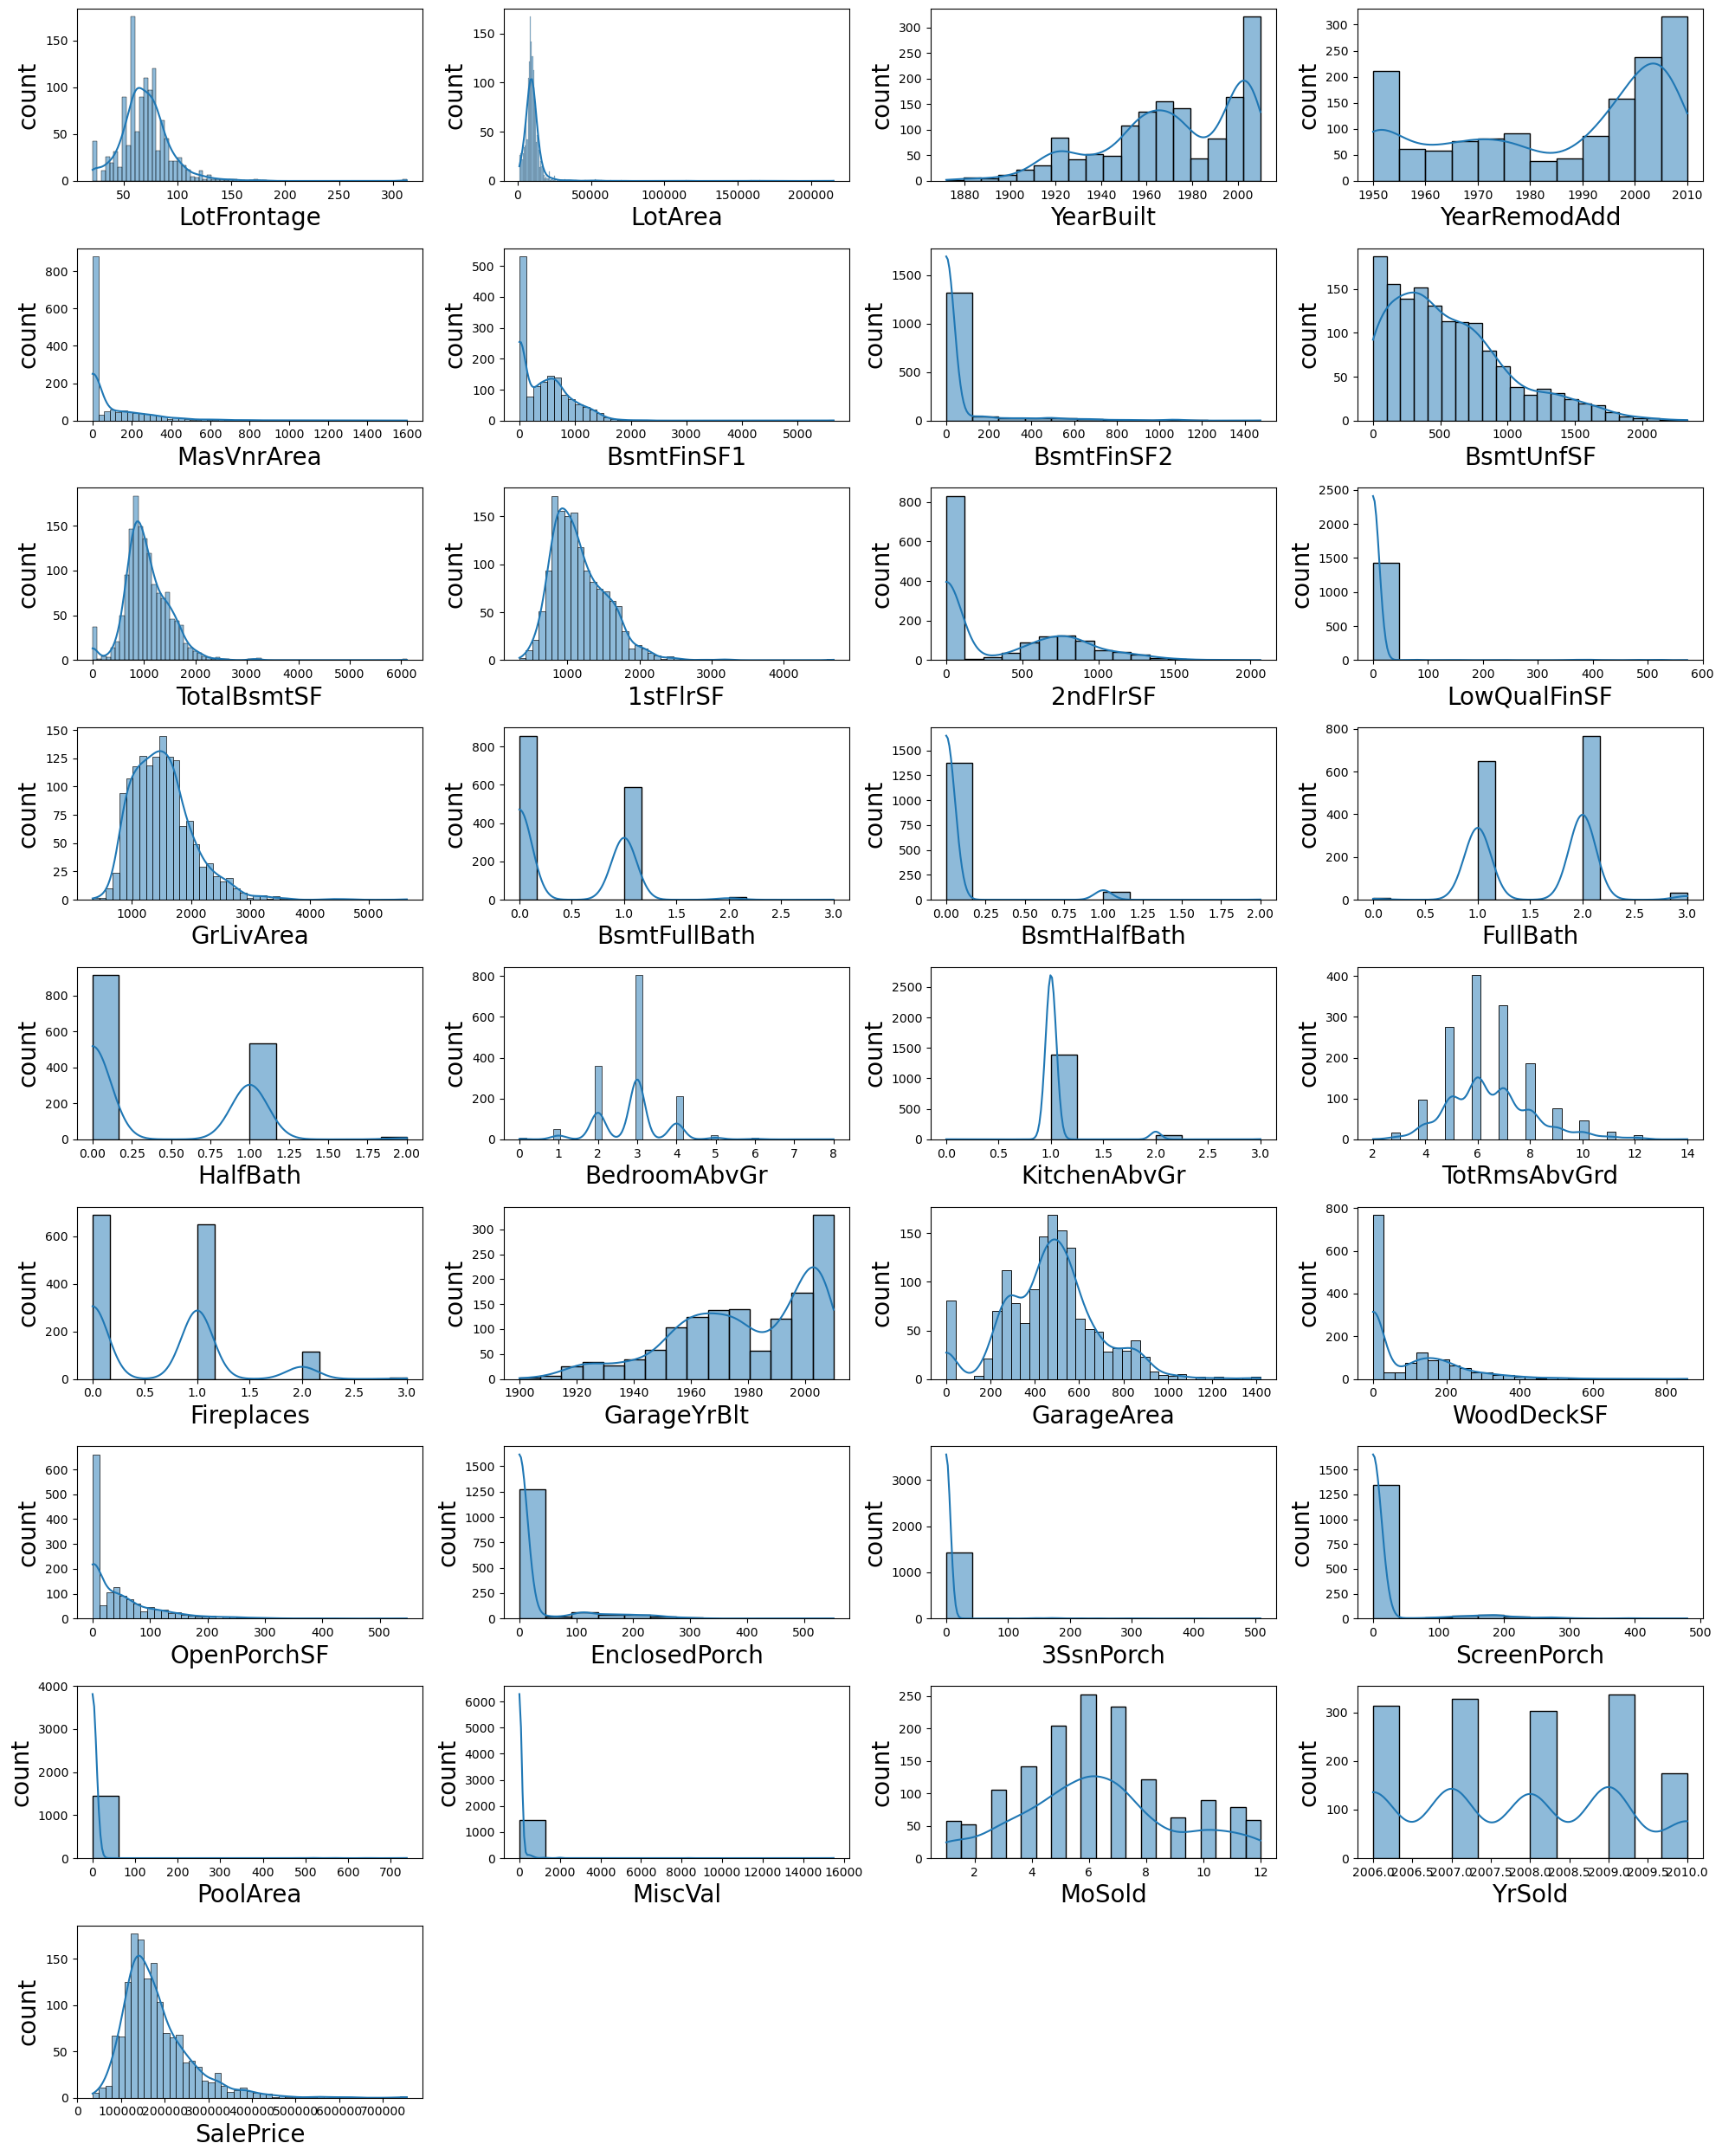

In [23]:
plt.figure(figsize=(20,25),facecolor='white')

plotnumber=1

for column in numerical_columns:
    if plotnumber<=33:
        ax=plt.subplot(9,4,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Univariate analysis of categorical columns

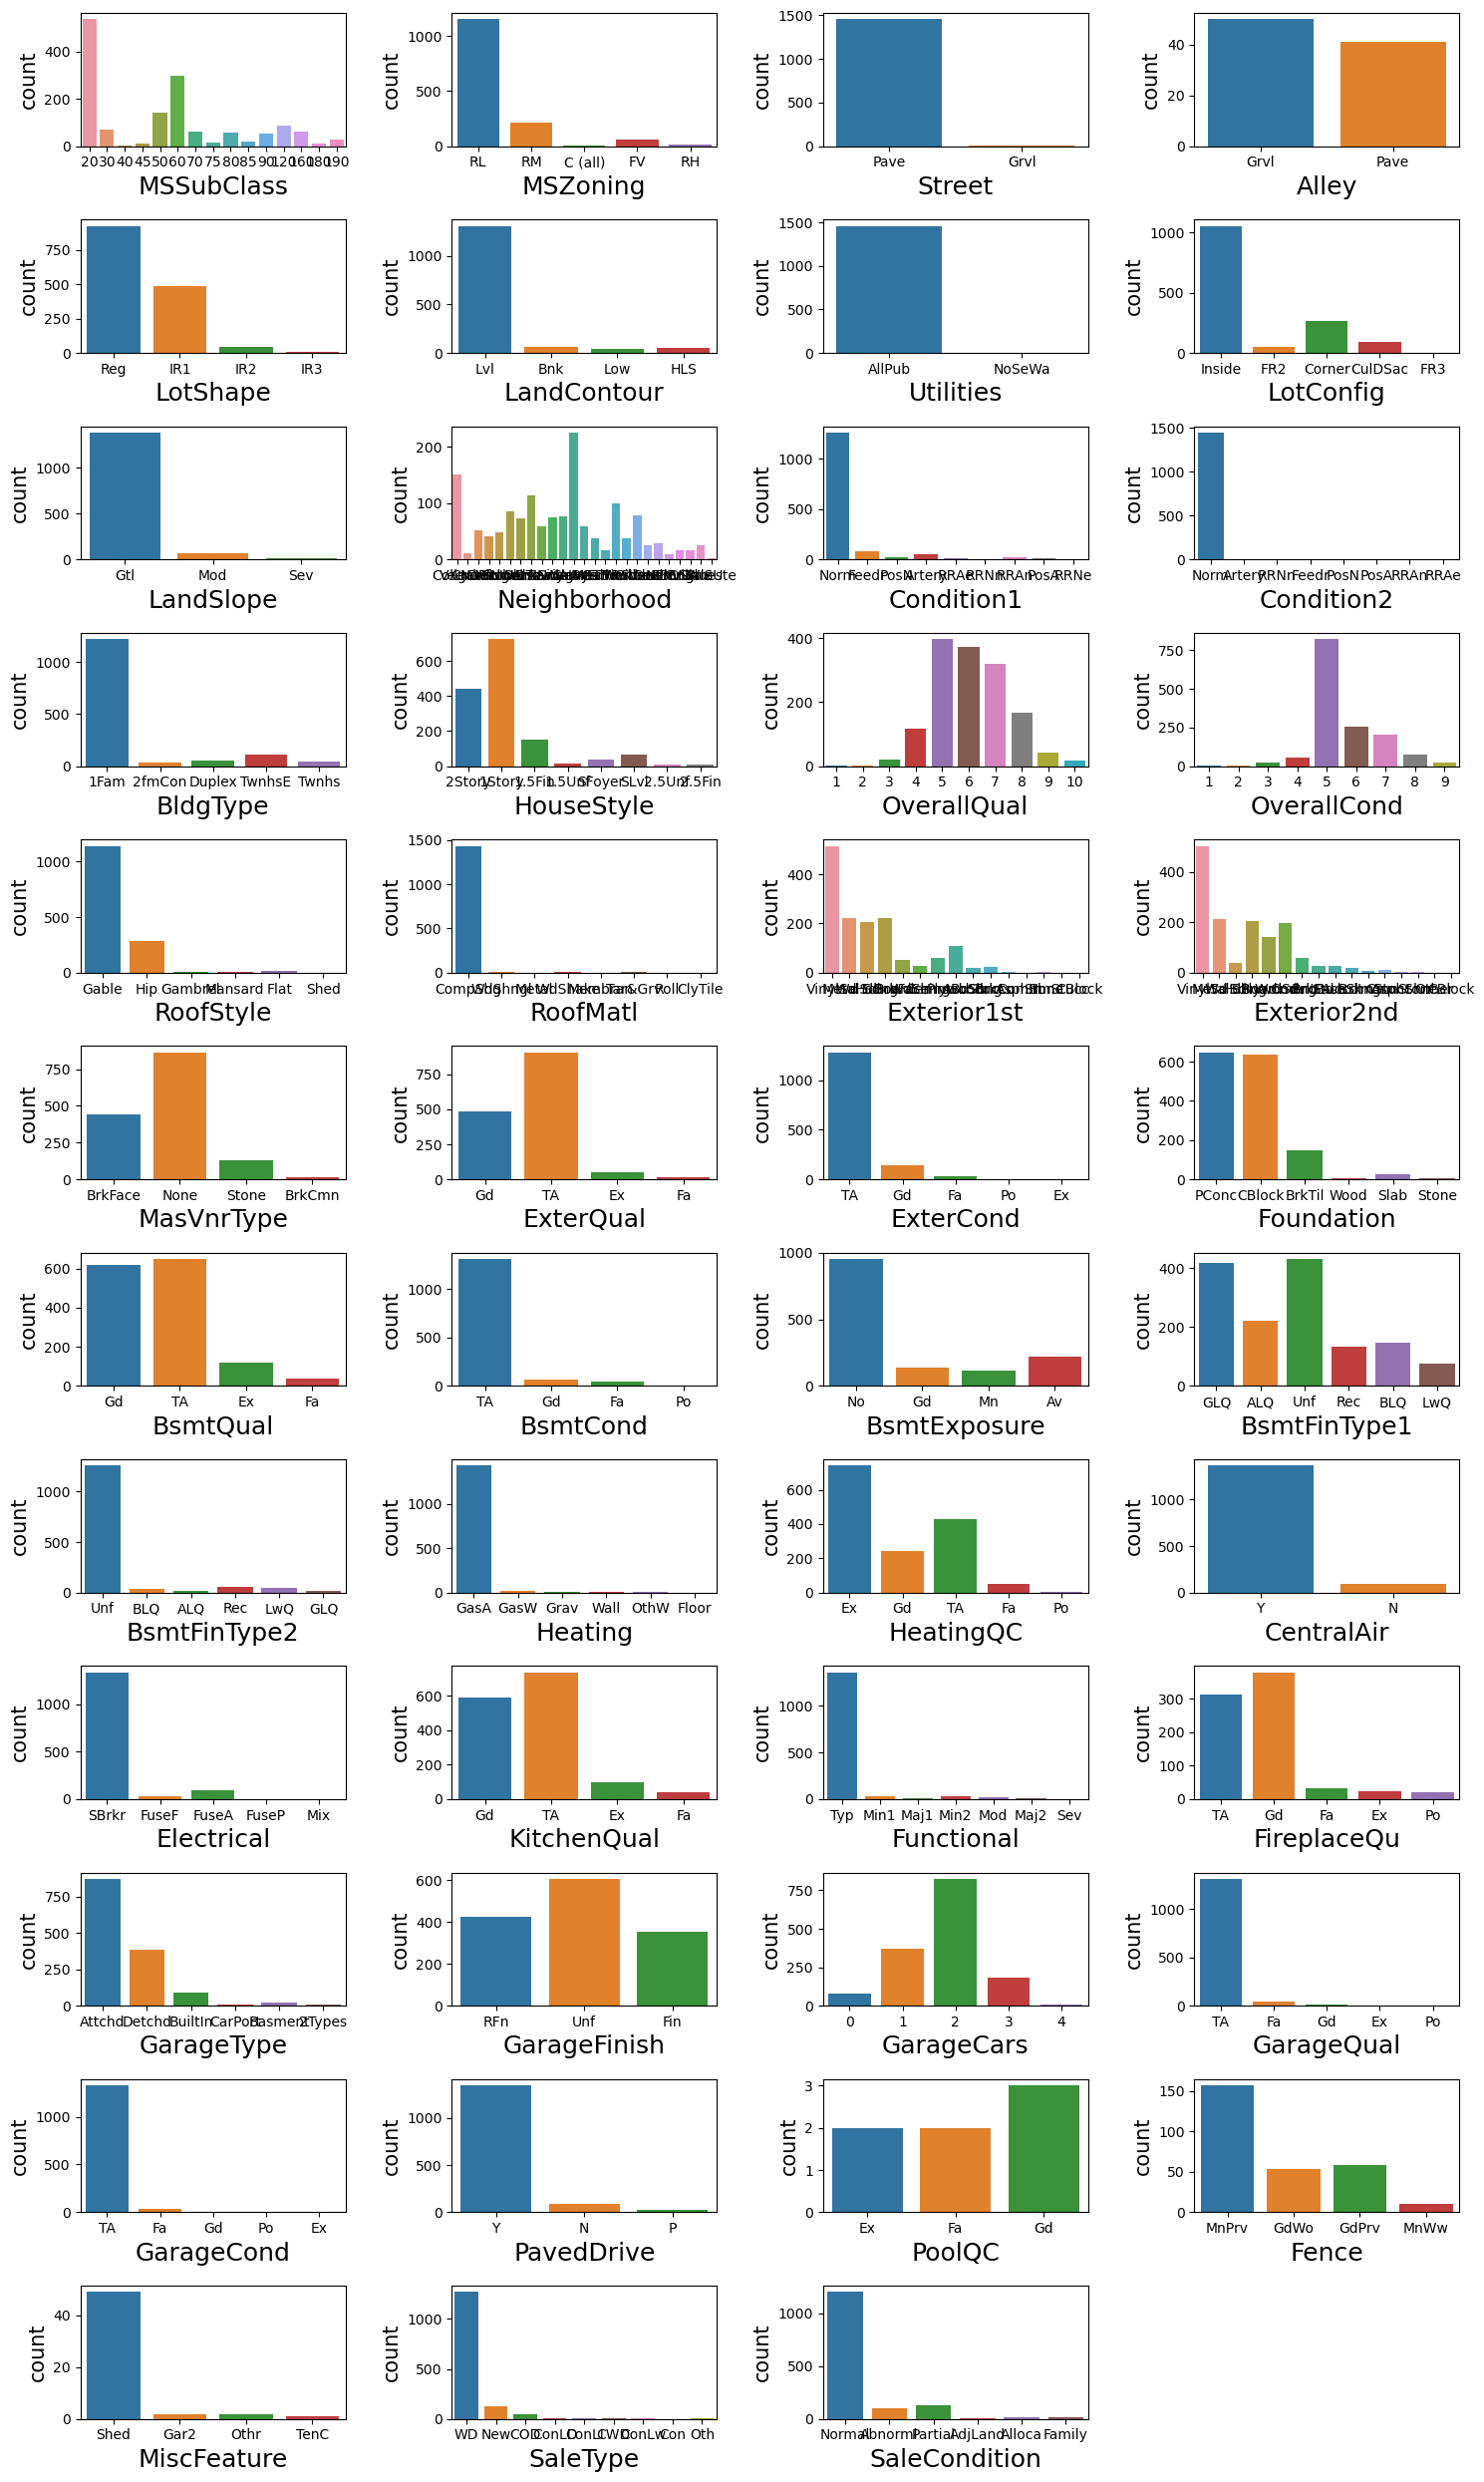

In [24]:
plt.figure(figsize=(15,25),facecolor='white')

plotnumber=1

for column in categorical_columns:
    if plotnumber<=47:
        ax=plt.subplot(12,4,plotnumber)
        sns.countplot(x=data[column])
        plt.xlabel(column,fontsize=18)
        plt.ylabel('count',fontsize=15)
    plotnumber+=1
plt.tight_layout()

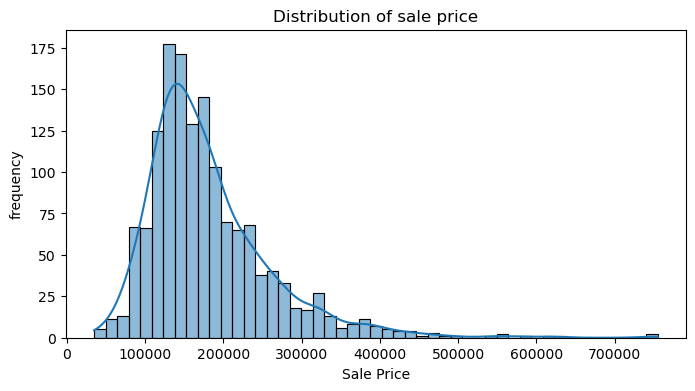

In [25]:
# Analysis of Target column

plt.figure(figsize=(8,4))
sns.histplot(data.SalePrice,kde=True)
plt.title('Distribution of sale price')
plt.xlabel('Sale Price')
plt.ylabel('frequency')
plt.show()


* The highest frequency of sale price is in the range 100000 to 200000
* the distribution of sale price is not normally distributed.
* the distribution is rightl skewed.

## Bivariate analysis
#### Bivariate analysis of numerical columns

* We take numerical and categorical features and analyze the highly correlated features with our target feature.
#### Numerical Analysis

* There are two types of numerical features 
* Discrete and Continuous
* If there are discrete features in our dataset, we need to separate them and analyze as categorical variables.
* Because if they are included in numerical analysis , we won't find any correlation between discrete features and target feature.


* First step , we separate discrete features

In [26]:
discrete=[]
for col in data.columns:
    if data[col].dtype=='int64' and len(data[col].unique()) <=15:
        discrete.append(col)

In [27]:
print('discrete features  :  ',discrete)

discrete features  :   ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold']


In [28]:
#Let's have a look at the unique values of each of these features
for col in discrete:
    print(col, ' has ',data[col].unique(),"unique values.")

BsmtFullBath  has  [1 0 2 3] unique values.
BsmtHalfBath  has  [0 1 2] unique values.
FullBath  has  [2 1 3 0] unique values.
HalfBath  has  [1 0 2] unique values.
BedroomAbvGr  has  [3 4 1 2 0 5 6 8] unique values.
KitchenAbvGr  has  [1 2 3 0] unique values.
TotRmsAbvGrd  has  [ 8  6  7  9  5 11  4 10 12  3  2 14] unique values.
Fireplaces  has  [0 1 2 3] unique values.
PoolArea  has  [  0 512 648 576 555 480 519 738] unique values.
MoSold  has  [ 2  5  9 12 10  8 11  4  1  7  3  6] unique values.
YrSold  has  [2008 2007 2006 2009 2010] unique values.


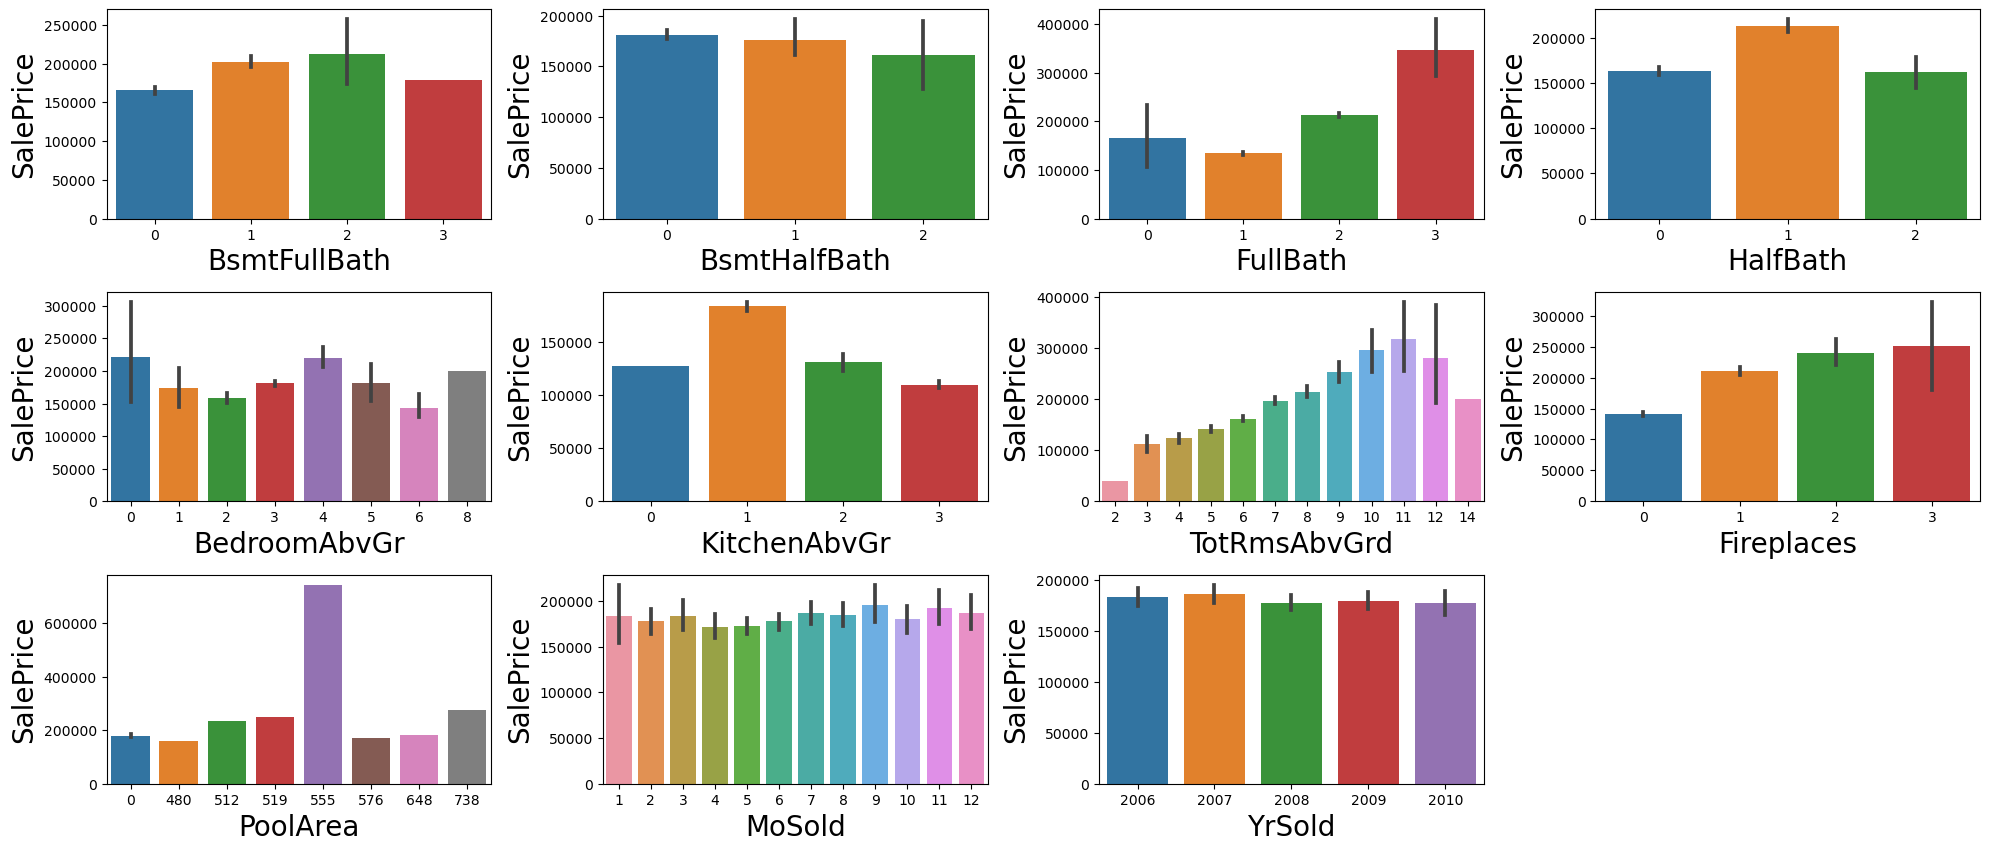

In [29]:
plt.figure(figsize=(20,25),facecolor='white')

plotnumber = 1

for column in discrete:
    if plotnumber<=36:
        ax = plt.subplot(9,4,plotnumber)
        #sns.countplot(x=data[column],hue=data['SalePrice'])
        a1 = sns.barplot(data=data,x=data[column],y=data["SalePrice"])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnumber+=1
plt.tight_layout()

* `Total Rooms Above Ground` :- As the total number of rooms increases , average price of the house increase until 11 rooms after which it sees a decrease in price.
* `Bedroom Above Ground` :- Here we don't see a exponential curve, as for 0 bedrooms the sale price is highest followed by 4 and 8 bedrooms.The lowest is for 2 and 6 bedrooms.
* `Kitchen Above ground` :- Here as the number increases , price decreases.Price is highest for only one kitchent that is enough .No one demands for more than one kitchen.
* `In `Basemnt Full bathrooms` and `Basement Half bathrooms` we don't see a much difference.If there is no bathroom,obviously price will be less.
* Now if we don't consider basement rooms,i.e Above grade `Full Bathrooms` and `Half bathrooms` .If there are 3 full bathrooms ,the price is highest and for 1 or 2 half bathrooms the average price is more than 150000.
* `Fireplaces` :- As fireplaces will increase in the house , sale price will also increase.
* `PoolArea` :- Here we are talking about square feet. And from the barplot 555 sqft area is having highest sale price on average.More Area , More Sale Price.
* `Year Sold` :- The houses in our dataset were sold from year 2006.We can see a bit downward slope from 2006 to 2010.
* `Month Sold` :- There is not much to study about which month the house sold has higher or lower Sale Price.

# Data Preprocessing / Data cleaning

## 1) checking duplicate rows

In [30]:
# To check the duplicate values in data.
data.duplicated().sum()

0

* There are no duplicate values/rows in data. 

## 2) Handle null values

In [31]:
# check the null values
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [32]:
data.isnull().sum().sum()

6965

* 6965 is a big number that tells us there are a lot of missing values in train dataset
* we have to handle it.

In [33]:
data.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

* There are very large number of missing values in columns PoolQC , MiscFeature , Alley , Fence 

In [34]:
# first we create a list of missing values by each feature.
temp = list(data.isnull().sum())

# then create the list of columns and their missing values as inner list to a seperate list
list1 = []
i=0
for col in data.columns:
    insert_lis= [col,temp[i]] 
    list1.append(insert_lis)
    i+=1
    
# finally create a data frame
temp_df = pd.DataFrame(data=list1,columns=['column_name','missing_values'])
temp_df

,column_name,missing_values
0,MSSubClass,0
1,MSZoning,0
2,LotFrontage,259
3,LotArea,0
4,Street,0
...,...,...
75,MoSold,0
76,YrSold,0
77,SaleType,0
78,SaleCondition,0


In [35]:
# The following columns have missing values

temp_df[temp_df['missing_values']>0].sort_values(by='missing_values',ascending=False ).reset_index(drop=True)

,column_name,missing_values
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,FireplaceQu,690
5,LotFrontage,259
6,GarageType,81
7,GarageYrBlt,81
8,GarageFinish,81
9,GarageQual,81


* There are 18 columns having missing values.
* Out of the 18 columns with missing values,
* three are numerical features LotFrontage,MasVnrArea and GarageYrBlt
* And the rest are categorical features.

* First we deal with the numerical features 
* LotFrontage has 259 missing values.
* MasVnrArea has only 8 missing values
* GarageyrBlt has 81 missing values.

Let's handle this null values 

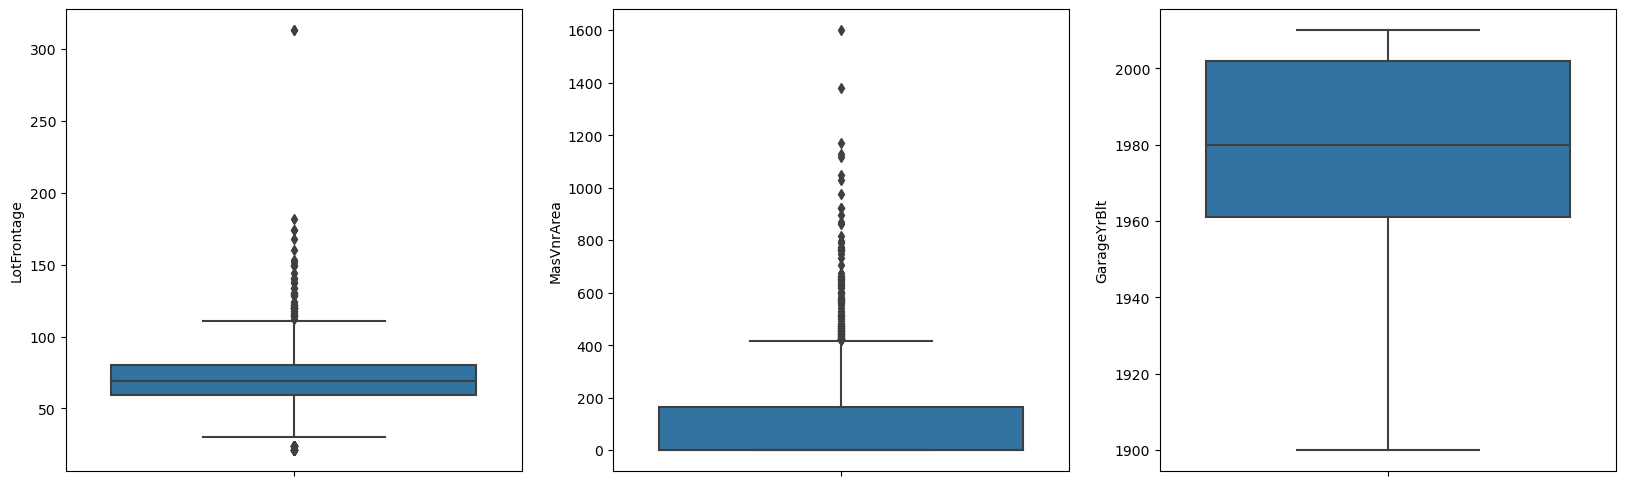

In [36]:
# If the column have less missing values then we no need to dropping the column
# If there are outliers in these three columns then we can fill them with their median value 
# If not then fill with mean is fine.

plt.figure(figsize=(20,6))

features = ['LotFrontage','MasVnrArea','GarageYrBlt']
temp = data[features]

plotnumber=1
for col in temp.columns:
    plt.subplot(1,3,plotnumber)
    ax = sns.boxplot(data=temp,y=col)
    plotnumber+=1


* There are outliers in LotFrontage and MasVnrArea.
* and in GarageYrBlt column there is no outliers present.
* So we fill the null values of LotFrontage and MasVnrArea by median value.
* and fill the null value in GarageYrBlt by mean value.

In [37]:
#Let's look at the mean and median values of all three columns

In [38]:
print(data['LotFrontage'].mean(),data['LotFrontage'].median())
print(data['MasVnrArea'].mean(),data['MasVnrArea'].median())
print(data['GarageYrBlt'].mean(),data['GarageYrBlt'].median())

70.04995836802665 69.0
103.68526170798899 0.0
1978.5061638868744 1980.0


* The mean and median values of MasVnrArea are significantly different.
* If there are outliers present, we'll go with median values.

In [39]:
features

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [40]:
#filling the missing values with median
for col in features:
    data[col].fillna(data[col].median(),inplace=True)
    

In [41]:
#We can see that there are no missing values present now

data[features].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

* Now there are no null values in numerical columns.
* now handle the null values in categorical columns.

In [42]:
features_to_handle =  ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish',
 'GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [43]:
features_to_handle

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

* Some of the categorical features have many missing values.
* instead of filling them simply we can drop them.
* PoolQC, MiscFeature, Alley and Fence are the categorical features with more than 1000 missing values in the dataset
* so we can drop them.

In [44]:
print(data.PoolQC.value_counts())
print(   )
print(data.MiscFeature.value_counts())
print(   )
print(data.Alley.value_counts())
print(    )
print(data.Fence.value_counts())

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

Grvl    50
Pave    41
Name: Alley, dtype: int64

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


* As there is very less data available for these four columns,we can drop them

In [45]:
# Droping the columns.

data.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [46]:
data.isnull().sum().sort_values(ascending=False)

FireplaceQu     690
GarageType       81
GarageCond       81
GarageFinish     81
GarageQual       81
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
MSZoning          0
SalePrice         0
Length: 76, dtype: int64

In [47]:
# Now look at the FireplaceQu feature
data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [48]:
data.FireplaceQu.mode()

0    Gd
Name: FireplaceQu, dtype: object

In [49]:
data.FireplaceQu = data.FireplaceQu.fillna('Gd')


In [50]:
data.FireplaceQu.isnull().sum()

0

In [51]:
#Out of the features to examine , following are left

features_to_examine = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2','Electrical','GarageType','GarageFinish',
 'GarageQual','GarageCond']



In [52]:
#  Impute the null values in remaining categorical columns by mode .
modes = data.mode().iloc[0]
data = data.fillna(modes)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [53]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

* Now there is no missing values present in our data.


### Creating Derived Variables

In [54]:
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
data['Total_sqr_footage'] = (data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['1stFlrSF'] + data['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))
#Creating derived column for total porch area 
data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] + data['EnclosedPorch'] + data['ScreenPorch'] + data['WoodDeckSF'])


In [55]:
#Lets drop these extra columns :
extraCols = ['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF']
data.drop(extraCols,axis=1,inplace=True)
data.shape# verifying the shape of the dataset

(1460, 66)

In [56]:
# As we can observe many variables/columns have only 1 value with maximum frequency
#lets drops the columns where the highest frequeny is >= 90%
ninty_percent = 1460*0.90 #1460 is the total number of rows
ninty_percent

1314.0

In [57]:
dropCols = [] 
for i in data.columns :
    if data[i].value_counts().max() >= ninty_percent:
        dropCols.append(i)
print(dropCols)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'MiscVal']


In [58]:
# Removing these columns
data.drop(dropCols,axis=1,inplace=True)
data.shape# verifying the shape of the dataset

(1460, 49)

## 3) Handle the Outliers

In [59]:
# Creating a new Column to determine the age of the property
data['Total_Age']=data['YrSold']-data['YearBuilt']
data['Garage_age'] = data['YrSold'] - data['GarageYrBlt']
data['Remodel_age'] = data['YrSold'] - data['YearRemodAdd']
#Also lets drop out variables like GarageYrBlt and YearRemodAdd as we are already calculating the number of years
drop_cols = ['GarageYrBlt','YearRemodAdd']
data.drop(labels = drop_cols, axis = 1, inplace=True) #Dropping the columns added in the list
print("The new size of the data is" , data.shape) #Printing the new Dataset Shape

The new size of the data is (1460, 50)


In [60]:
# for only numerical columns 
num_columns = data.select_dtypes(include=['int','float'])
num_columns

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,...,GarageArea,MoSold,YrSold,SalePrice,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,Total_Age,Garage_age,Remodel_age
0,60,65.0,8450,7,5,2003,196.0,150,856,1710,...,548,2,2008,208500,2416,3.5,61,5,5.0,5
1,20,80.0,9600,6,8,1976,0.0,284,1262,1262,...,460,5,2007,181500,2240,2.5,298,31,31.0,31
2,60,68.0,11250,7,5,2001,162.0,434,920,1786,...,608,9,2008,223500,2272,3.5,42,7,7.0,6
3,70,60.0,9550,7,5,1915,0.0,540,756,1717,...,642,2,2006,140000,1933,2.0,307,91,8.0,36
4,60,84.0,14260,8,5,2000,350.0,490,1145,2198,...,836,12,2008,250000,2853,3.5,276,8,8.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,0.0,953,953,1647,...,460,8,2007,175000,1647,2.5,40,8,8.0,7
1456,20,85.0,13175,6,6,1978,119.0,589,1542,2073,...,500,2,2010,210000,3026,3.0,349,32,32.0,22
1457,70,66.0,9042,7,9,1941,0.0,877,1152,2340,...,252,5,2010,266500,2615,2.0,60,69,69.0,4
1458,20,68.0,9717,5,6,1950,0.0,0,1078,1078,...,240,4,2010,142125,2156,2.0,478,60,60.0,14


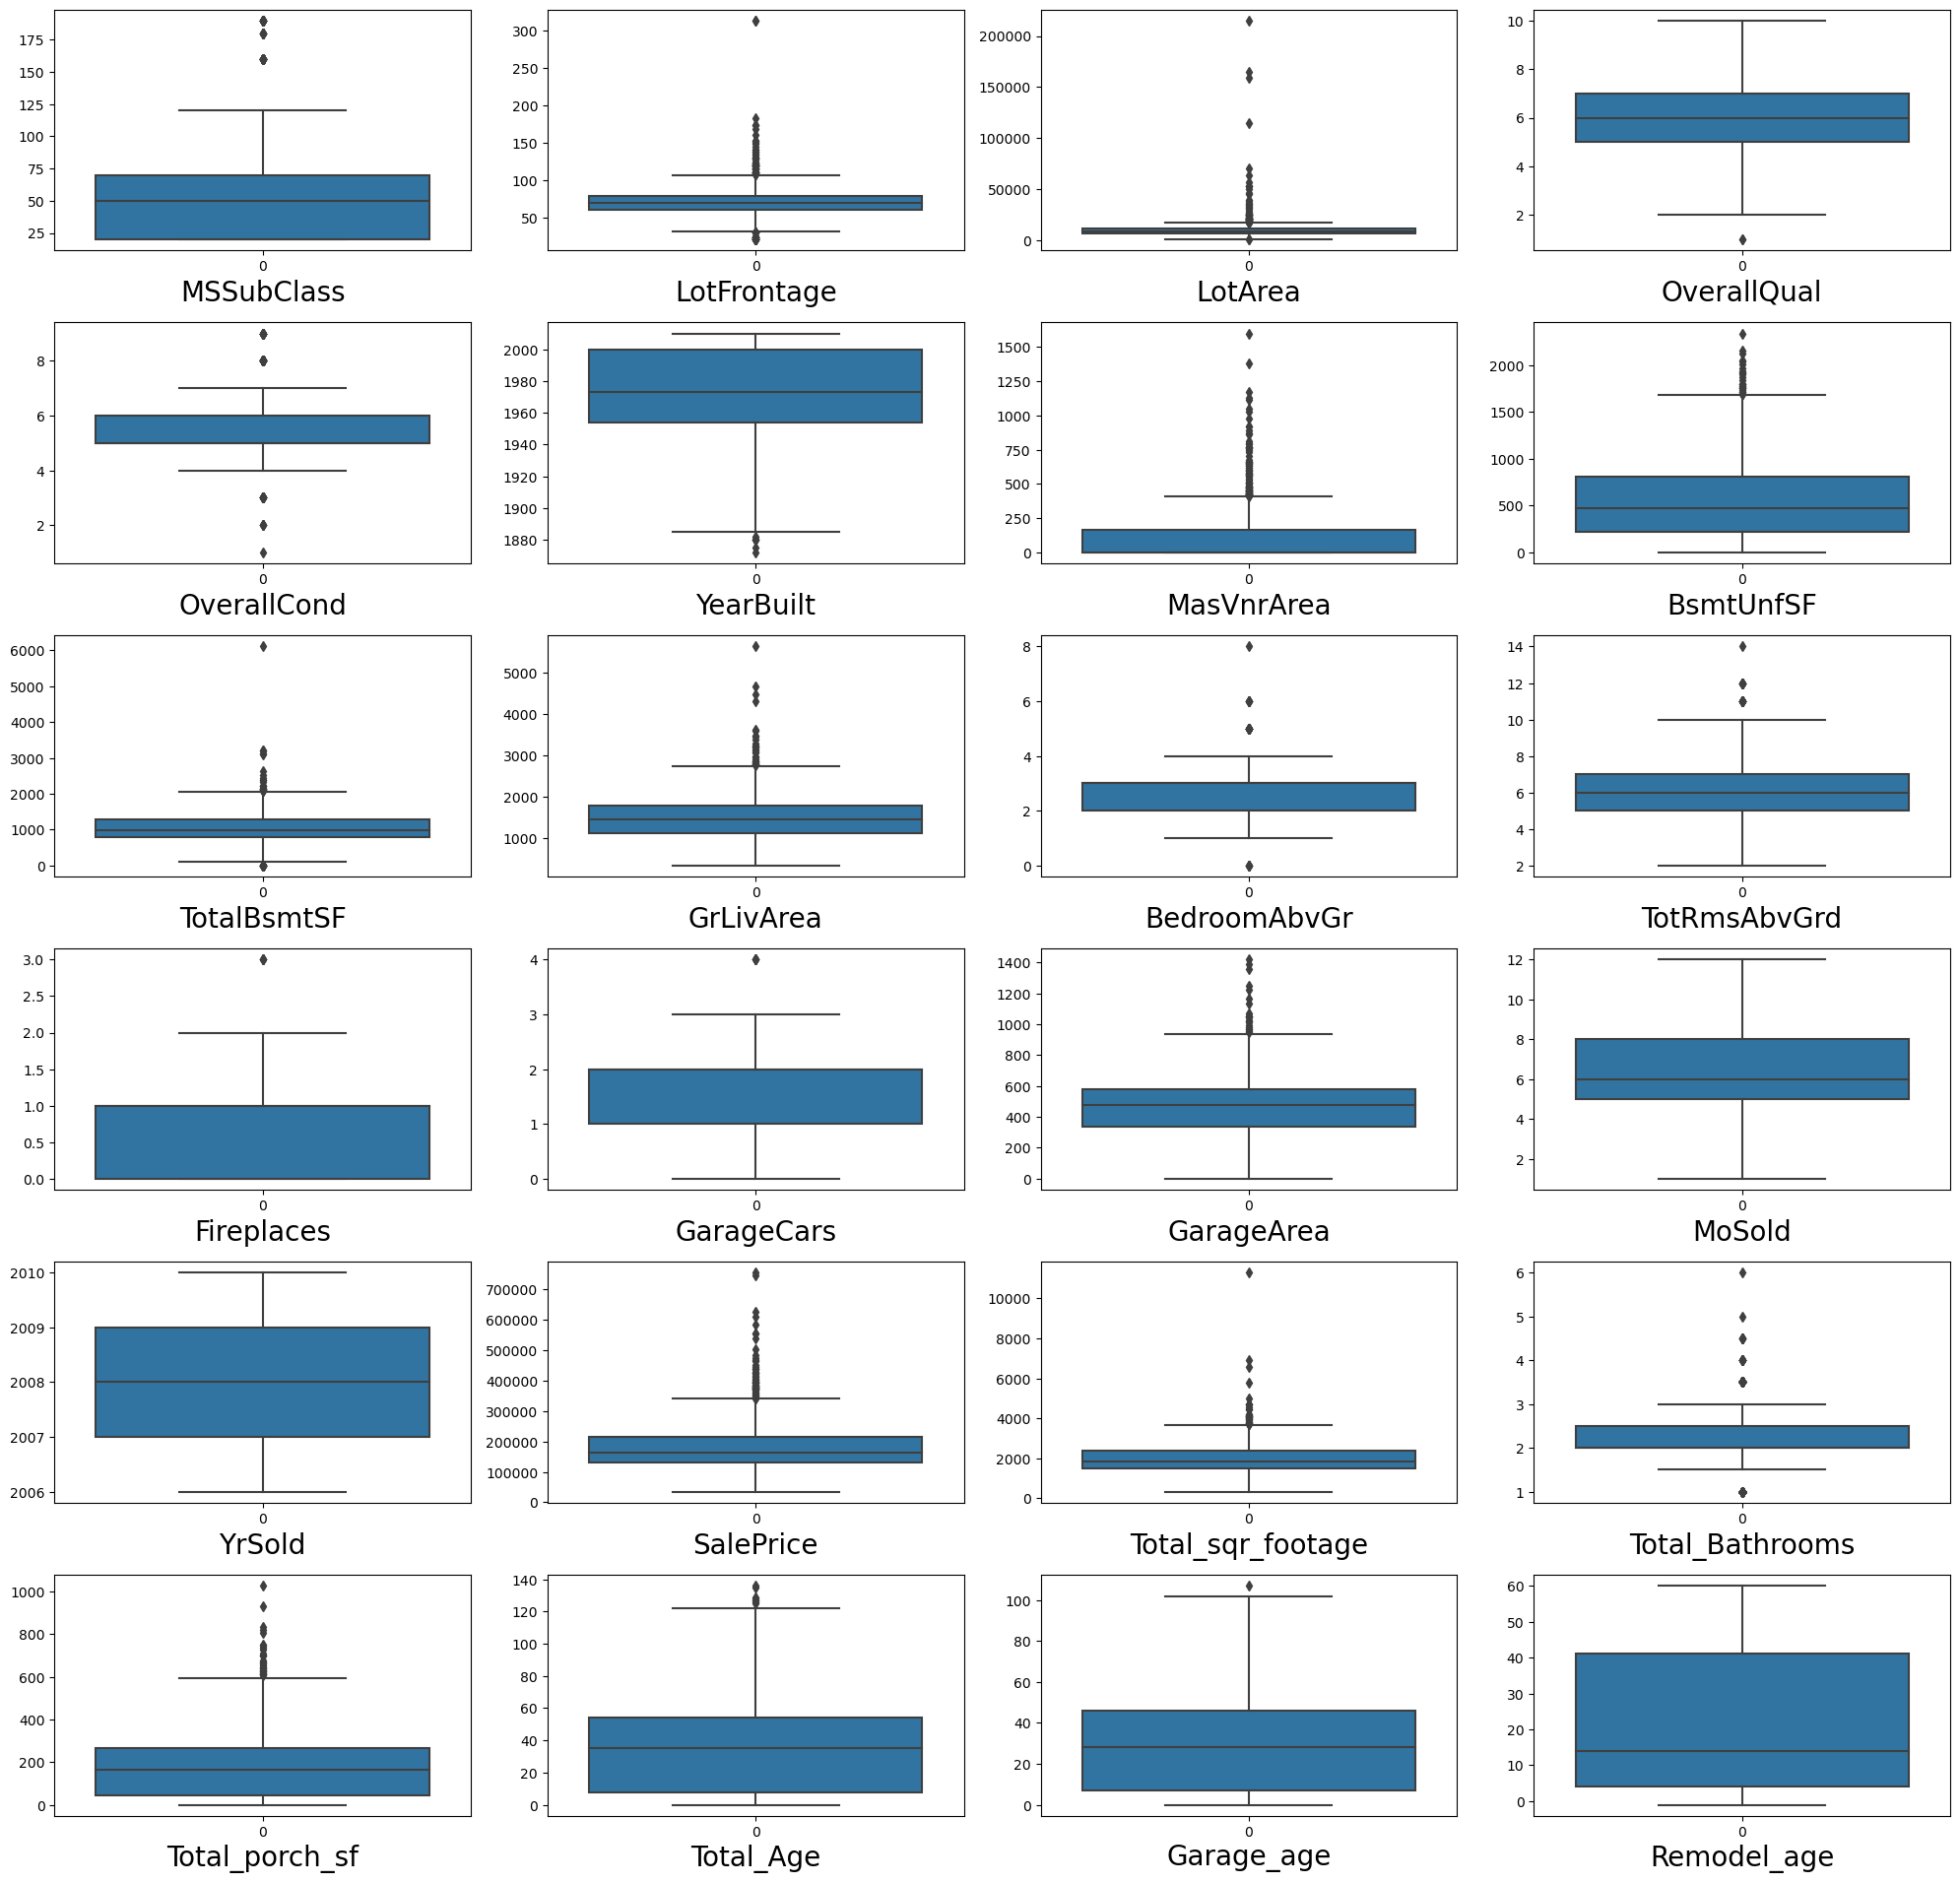

In [61]:
# To display the outliers in all columns/features in one code using for loop.

plt.figure(figsize=(20,25),facecolor='white')

plotnumber=1

for column in num_columns:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [62]:
#As we can observe there are outlier in many columns, listing them below
outlier = ['LotFrontage','LotArea','MasVnrArea','GrLivArea','Total_sqr_footage','Total_porch_sf']
for i in outlier:
    qnt = data[i].quantile(0.98)#removing data above 98 percentile
    data = data[data[i] < qnt]

In [63]:
# Lets observe the new shpe of the data 
data.shape

(1290, 50)

* Also we can see Outliers in some morevariables but we will not drop them since this may lead to data loss , the outliers will be treated during min-max ( normalisation ) scaling as handling outliers could lead us to data loss

# Feature Selection

* We'll have a look at the correlation between all the features with the help of Heatmap.
* Heatmap will tell us which features are positively ,negatively and have no correlation with our target feature that we are trying to predict here .i.e Sale Price.
* As there are a lot of features , we'll take 10 features at a time for better visual analysis.
* those feature which are highly correlated that is have the high multi collinearity , we have to drop one of the feature.
* In feature selection we drop the columns who are multi collinear .i.e. those columns ( independent features) who are more corelated to each other then we delete one of them.
* and features which are not more correlated to target variable we also drop that feature.
* When selecting features based on correlation in a heatmap, typically a threshold is set to identify which correlations are considered high. 
* This threshold can vary depending on the problem and the dataset, but common thresholds are around 0.7 or 0.8. 
* Features with correlation coefficients above this threshold may be considered highly correlated and may be candidates for feature selection or dropping.


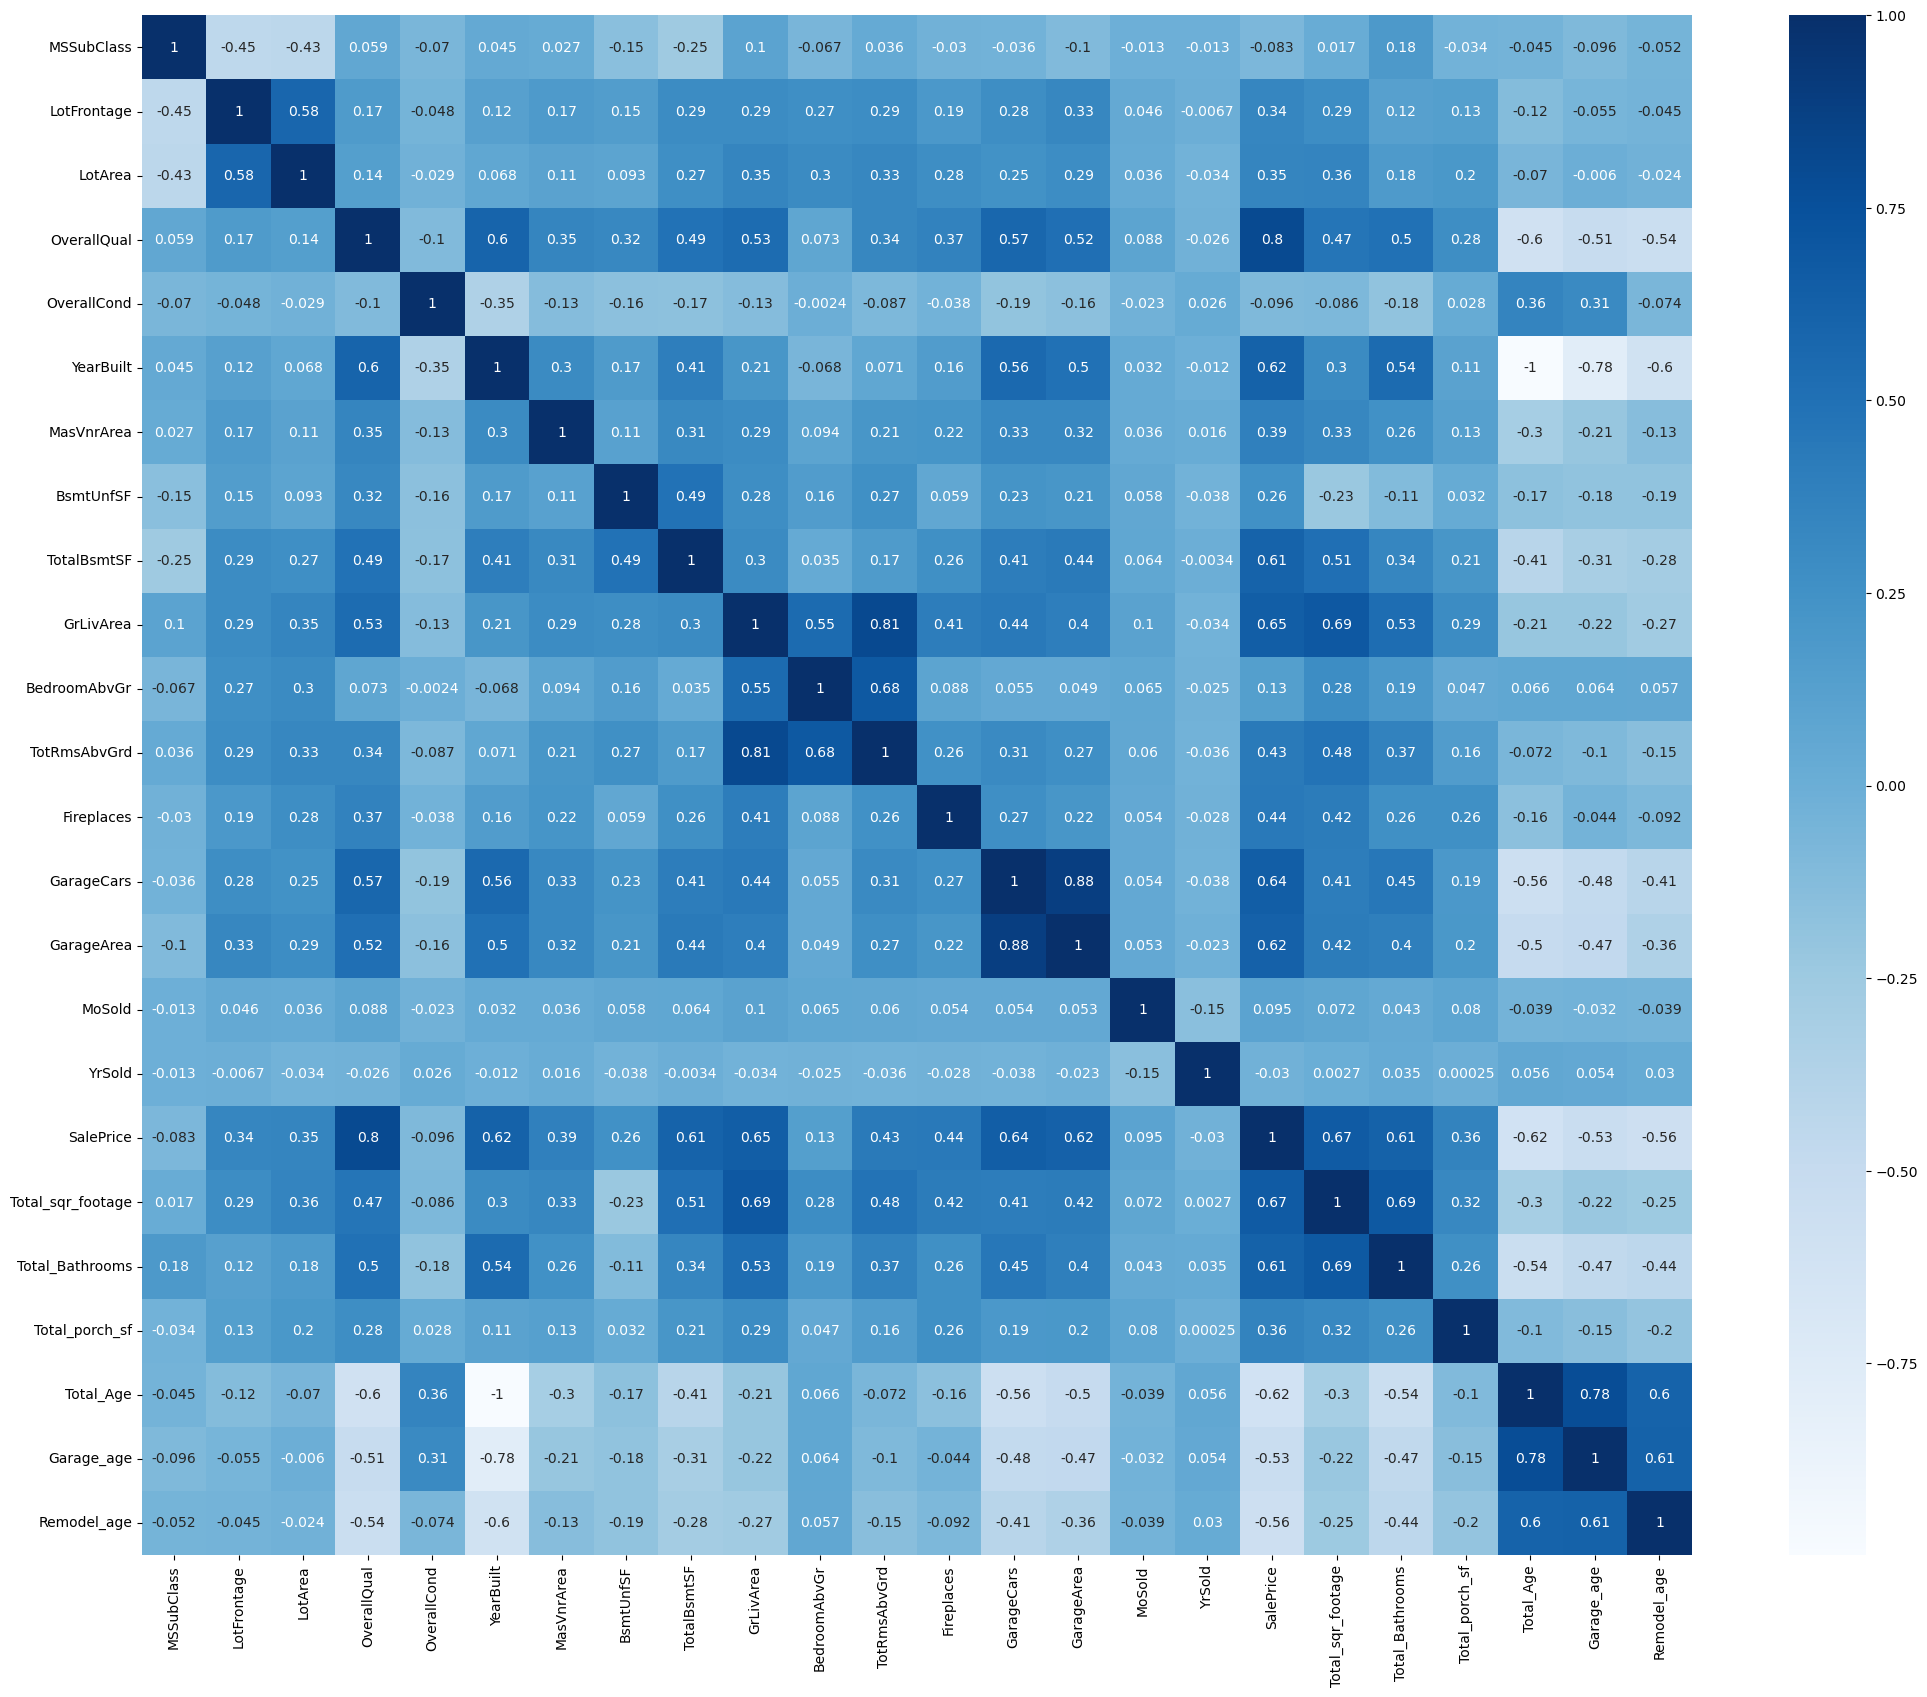

In [64]:
# Checking the correlation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(data.corr(), cmap='Blues' , annot=True, center = 0)
plt.show()

* In this heat map we can see that,
* TotRmsAbvGrd and GrLivArea are highly correlated. In this the GrLivArea is high related to target variable. so we can drop TotRmsAbvGrd feature. 
* Total_sqr_footage and Total_Bathrooms. Total_sqr_footage is highly impact the target variable as compared to Total_Bathrooms.so we can drop Total_Bathrooms.
* total_Age and Garage_age are also high correlate to each other. In this we can drop Garage_age.
* so, we can drop one of the feature in each pair.


In [65]:
data.drop(['TotRmsAbvGrd','Total_Bathrooms','Garage_age'],axis=1,inplace=True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_sqr_footage,Total_porch_sf,Total_Age,Remodel_age
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,548,2,2008,WD,Normal,208500,2416,61,5,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,460,5,2007,WD,Normal,181500,2240,298,31,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,608,9,2008,WD,Normal,223500,2272,42,7,6
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,642,2,2006,WD,Abnorml,140000,1933,307,91,36
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,836,12,2008,WD,Normal,250000,2853,276,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,62.0,7500,Reg,Lvl,Inside,Somerst,Norm,1Fam,...,400,10,2009,WD,Normal,185000,1631,113,5,4
1455,60,RL,62.0,7917,Reg,Lvl,Inside,Gilbert,Norm,1Fam,...,460,8,2007,WD,Normal,175000,1647,40,8,7
1456,20,RL,85.0,13175,Reg,Lvl,Inside,NWAmes,Norm,1Fam,...,500,2,2010,WD,Normal,210000,3026,349,32,22
1457,70,RL,66.0,9042,Reg,Lvl,Inside,Crawfor,Norm,1Fam,...,252,5,2010,WD,Normal,266500,2615,60,69,4


* We drop the columns.

* Among the first 10 numerical features, 
* Above Ground Living Area sq ft is having a `positive correlation` of **0.71** with `Sale Price` which is obvious.
* `Total Basement surface area` and `first floor surface area` also have a positive correlation of **0.61** with `Sale Price`.
* We also expect `LotArea` to have a better correlation with Sale Price as increase in LotArea may also increase price of the house.
* We can see two features have negative correlation with SalePrice.
* BsmtFinSF2 [-0.011]
* LowQualFinSF [-0.026]

* In the next ten features , `Garage Area` has a **positive** correlation of **0.62** with `Sale Price`.
* `FullBath` is having a positive correlation of **0.56**.
* `TotRmsAbvGrd` feature has a **0.53** correlation with SalePrice.

## 4) Convert categorical data to numerical format

* We use the encoding methods to convert the categorical data to numerical data.
* In this data there are some columns which are categorical so we have to convert them in numerical format using Encoding methods.


- We will create Dummy Variables using **`get_dummies`** function
- We will use the parameter **`drop_first`** as True to drop the 1st dummy variable of each categorical column to increases the efficiency of the model
- We will use the orginal dataset so that the orginal categorical column gets removed which again increases the efficiency of the model

In [66]:
data = pd.get_dummies(data,drop_first=True)
data.info()#displaying the updated Datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 0 to 1458
Columns: 174 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(19), uint8(153)
memory usage: 414.5 KB


In [67]:
# display the encoded data
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,196.0,150,856,1710,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,0.0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,162.0,434,920,1786,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,0.0,540,756,1717,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,350.0,490,1145,2198,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500,7,5,2004,0.0,811,1221,1221,...,0,0,0,0,1,0,0,0,1,0
1455,60,62.0,7917,6,5,1999,0.0,953,953,1647,...,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,119.0,589,1542,2073,...,0,0,0,0,1,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,0.0,877,1152,2340,...,0,0,0,0,1,0,0,0,1,0


In [68]:
# check the shape of updated data
data.shape

(1290, 174)

* There are 1290 rows and 174 columns in our data set.

## 5) Scaling 

- We perform scaling to bring the all variables to same scale , also scaling helps in optimisation of the model
- Scaling are basically 2 types, min-max (normalisation) and standardisation
- Here we will perform **Min-max Scaling on Continous Columns**
- This is because min-max scaling also **handles the outliers** of the variables and keep all values between 0 and 1
- Here we will use **fit_transform** on the training data.
- fit_transform is used on the training data so that we can **scale the training data** as well as **learn the scaling parameters.**

In [69]:
num_cols = data.select_dtypes(include=['int','float'])
num_cols = num_cols.drop(['SalePrice'],axis=1).columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold',
       'YrSold', 'Total_sqr_footage', 'Total_porch_sf', 'Total_Age',
       'Remodel_age'],
      dtype='object')

In [70]:
# Import the min max scaler 
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaling
scaler = MinMaxScaler()

# Fit and transform the data.
data[num_cols] = scaler.fit_transform(data[num_cols])

In [71]:
# The data in percentile after min max scaling.
data[num_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,Fireplaces,GarageCars,GarageArea,MoSold,YrSold,Total_sqr_footage,Total_porch_sf,Total_Age,Remodel_age
count,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
mean,0.220087,0.466017,0.381612,0.550818,0.571899,0.713257,0.126799,0.265587,0.313320,0.473923,0.470284,0.182171,0.424806,0.324739,0.486822,0.452907,0.504604,0.292198,0.274869,0.396822
std,0.254290,0.174089,0.163950,0.143053,0.138270,0.217965,0.205205,0.204442,0.118666,0.179163,0.129232,0.204195,0.181753,0.145283,0.245593,0.330974,0.192035,0.235194,0.221505,0.348441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.393939,0.285991,0.444444,0.500000,0.579710,0.000000,0.103371,0.243294,0.332283,0.333333,0.000000,0.250000,0.221583,0.363636,0.250000,0.370909,0.073529,0.058824,0.066667
50%,0.176471,0.484848,0.378090,0.555556,0.500000,0.721014,0.000000,0.228430,0.297255,0.461522,0.500000,0.000000,0.500000,0.332374,0.454545,0.500000,0.481983,0.273897,0.264706,0.266667
75%,0.294118,0.545455,0.470298,0.666667,0.625000,0.927536,0.212500,0.378949,0.380147,0.594239,0.500000,0.333333,0.500000,0.406295,0.636364,0.750000,0.617769,0.451287,0.411765,0.716667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* All the continous variables are successfully scaled where the max value is 1 and min value is 0

## 6) Data Balancing

* Data Balancing is applied only on classification task.
* and our data is regression task. 
* So we do not need to perform data balancing.

# Model Creation

In [72]:
# Creating independent and dependent variables.

x = data.drop(['SalePrice'],axis=1)
y=data.SalePrice

In [73]:
x.shape

(1290, 173)

In [74]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
Name: SalePrice, Length: 1290, dtype: int64

##### Spliting data in training and testing 
* we use the train_test_split function in scikit learn library from the model_selection module
* 'x' represents your features (independent variables).
* 'y' represents your target variable (dependent variable).
* test_size specifies the proportion of the dataset to include in the testing set (e.g., 0.2 for 20%).
* random_state is an optional parameter that sets the random seed for reproducibility.

In [75]:
# Import train_test_split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=24)

In [76]:
x_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
611,0.352941,0.484848,0.440863,0.555556,0.625,0.768116,0.364063,0.201320,0.321896,0.303478,...,0,0,0,0,1,0,0,0,1,0
929,0.235294,0.484848,0.567426,0.666667,0.500,0.905797,0.445312,0.454503,0.300686,0.826957,...,0,0,0,0,1,0,0,0,1,0
125,1.000000,0.393939,0.265633,0.555556,0.875,0.456522,0.000000,0.014144,0.162196,0.182609,...,0,0,0,0,1,0,0,0,1,0
1253,0.235294,0.484848,0.787300,0.666667,0.750,0.739130,0.000000,0.016973,0.371803,0.796957,...,0,0,0,0,1,0,0,0,1,0
1330,0.000000,0.646465,0.421716,0.777778,0.500,0.971014,0.640625,0.748703,0.495321,0.545217,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.000000,0.484848,0.476006,0.555556,0.625,0.811594,0.000000,0.269684,0.384279,0.390435,...,0,0,0,0,1,0,0,0,1,0
392,0.000000,0.484848,0.341202,0.444444,0.750,0.630435,0.000000,0.000000,0.000000,0.238261,...,0,0,0,0,1,0,0,0,1,0
217,0.294118,0.363636,0.417159,0.333333,0.375,0.384058,0.000000,0.323432,0.213974,0.432174,...,0,0,0,0,1,0,0,1,0,0
1020,0.000000,0.393939,0.277460,0.333333,0.500,0.963768,0.000000,0.050919,0.353088,0.346957,...,0,0,0,0,1,0,0,0,1,0


In [77]:
y_train

611     148000
929     222000
125      84500
1253    294000
1330    227000
         ...  
160     162500
392     106500
217     107000
1020    176000
476     208900
Name: SalePrice, Length: 967, dtype: int64

In [78]:
x_train.shape

(967, 173)

In [79]:
x_test.shape

(323, 173)

### Train the different models
* Here in this data the target variable is continuos variable.
* so we use the regression task.
* We use models like decision tree regressor , random forest regressor , gradient boosting regressor,support vector regressor etc.

### 1) Decision tree regressor
* A decision tree regressor is a type of machine learning algorithm used for regression tasks. 
* It operates by recursively partitioning the feature space into smaller regions and fitting a simple model (usually a constant value) within each region.
* These partitions form a tree-like structure where each internal node represents a decision based on a feature value, and each leaf node represents a predicted value.
* decision tree regressors have several advantages, including their interpretability, ability to handle non-linear relationships, and robustness to outliers. 
* However,the decision trees are prone to overfitting, especially when the tree is allowed to grow deep. Techniques like pruning, ensemble methods (e.g., Random Forest, Gradient Boosting), and regularization can help alleviate this issue.


In [80]:
# Importing the decision tree regressor.
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regression model
dt_re = DecisionTreeRegressor(random_state=42)

# Training the model
dt_re.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

##### Checking the performance of model.

In [81]:
# predict the values of Testing data 
ytt = dt_re.predict(x_test)
ytt

array([155000., 202500., 314813., 171000., 118500., 124900., 173500.,
       119900., 109000., 169900., 249700., 128000., 154500., 160000.,
       140000., 167000., 217000.,  40000., 190000., 160000., 197000.,
        82000., 147000.,  62383., 190000., 113000., 192000.,  75000.,
       140000., 219210., 155000.,  91500., 217000., 160200., 185000.,
       440000., 155000., 143000.,  66500., 250000., 162000., 217000.,
        84000., 232600., 159000., 188000., 130000., 109500., 140000.,
       124500., 140000., 207500., 275000., 175000., 284000., 131500.,
        82500., 180000., 142500., 133000., 105000., 133700., 159500.,
       181000., 110000., 139000., 170000., 149900., 107900., 180000.,
       120000., 113000., 213250., 295493., 275000., 160000., 173900.,
       185000., 105900., 103200., 200000., 290000., 149000., 168500.,
       194500., 143000.,  91000., 159895., 200000., 215000., 124500.,
       176000., 228500., 127500., 188500., 165000., 105000., 144000.,
       187100., 3170

In [82]:
# checking the accuracy or evaluate the model.
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

r22 = r2_score(y_test,ytt)
r22

0.7199249963403753

### 2) Random Forest Regressor
* A Random Forest Regressor is an ensemble learning method based on decision trees. 
* It builds multiple decision trees during training and outputs the mean prediction of the individual trees for regression tasks. 
* Random Forests can be computationally expensive and may not be as interpretable as single decision trees. 

In [83]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)  # ravel() flattens the y_train array to 1D


RandomForestRegressor()

In [84]:
# Predicting the test set results
y_pr = random_forest.predict(x_test)
# checking accuracy
r2s = r2_score(y_test,y_pr)
r2s

0.8715946901950075

### 3) Gradient boosting regressor
* Gradient Boosting Regressor is a machine learning algorithm used for regression tasks, where the goal is to predict continuous numerical values. 
* It belongs to the family of ensemble learning methods, specifically boosting algorithms.

In [85]:
# Importing 
from sklearn.ensemble import GradientBoostingRegressor
# Initialize the model
gb = GradientBoostingRegressor()
# Train the model
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [86]:
yh = gb.predict(x_test)
yh

array([167078.1744344 , 178556.41229404, 342068.01282743, 167898.32179508,
       123123.96479854, 146994.20989088, 171393.95900815, 115542.61571216,
        83959.0507771 , 138297.34308194, 281864.87479045, 118019.15122929,
       156936.68873233, 169136.87620269, 144982.22020269, 196699.03403884,
       204050.56650369,  95146.67114727, 198467.06329855, 147612.61927394,
       196695.50725588,  64670.7529522 , 144562.63203783, 124730.33230006,
       200295.83081705,  93677.77064459, 223402.05627595, 112266.2509359 ,
       146327.48083127, 192646.85836231, 166778.73792988,  99275.36978724,
       206848.74759863, 174269.1577337 , 190874.10199258, 355295.98589861,
       158732.34069748, 141762.31800658,  75142.58772082, 257225.4641523 ,
       181311.69286426, 208976.05297028,  71282.98183689, 253785.86969295,
       162536.94639042, 148253.87993878, 137166.6358209 ,  95541.16736451,
       153423.60832238, 102691.22718602, 160099.76305653, 249423.68362685,
       312290.08395107, 1

In [87]:
# checking the accuracy or evaluate the model.
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

r2sc = r2_score(y_test,yh)
r2sc

0.8908084220852541

### 4) support vector regressor
* Support vector regression is an extension of support vector machines for regression tasks. 
* It tries to find a hyperplane that best fits the data while minimizing the error.

In [88]:
# import th svr
from sklearn.svm import SVR
# Initialize the model
sv = SVR(C=100)
# train the model
sv.fit(x_train,y_train)

SVR(C=100)

In [89]:
yp = sv.predict(x_test)
yp

array([159118.05938196, 158089.03033007, 159625.2454705 , 157290.64575403,
       148932.83385389, 151168.02840539, 163434.43148967, 153015.14772318,
       150875.8437296 , 154293.29571475, 163982.31314053, 151262.0808081 ,
       153176.63698935, 153836.82732089, 152520.77507878, 152480.78796734,
       153496.24639442, 150870.48957616, 161421.9772849 , 151688.0265077 ,
       162554.40901306, 153304.93647369, 158341.00790377, 153150.98414291,
       157224.44275139, 150382.52940594, 160295.11471403, 153082.79160049,
       156736.67981897, 153948.89119239, 154220.07079665, 151540.37053629,
       164265.76552549, 162870.34777485, 157587.59988847, 161304.47998263,
       153204.0651549 , 153156.81114861, 149399.55935159, 163979.67887096,
       157655.19881807, 159069.5365937 , 149065.07635539, 158743.2500454 ,
       152821.91877277, 155284.0578549 , 151754.35594028, 150250.89009434,
       157563.62352261, 150503.96083209, 153230.49435582, 160401.66761601,
       162274.36586187, 1

In [90]:
# checking the accuracy or evaluate the model.
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

rs = r2_score(y_test,yp)
rs

0.08198115952203078

### 5) XGBoost Regressor
* XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm known for its performance and efficiency in various types of predictive modeling tasks, including both classification and regression.

* In the context of regression, XGBoost Regressor is a variant of the XGBoost algorithm specifically designed for regression problems. 
* It builds an ensemble of decision trees sequentially, where each tree tries to correct the errors made by the previous ones.

In [91]:
import xgboost

# importing the model library.
from xgboost import XGBRegressor

# object creation.
xgb_r = XGBRegressor()

# fitting the data
xgb_r.fit(x_train,y_train)

# prediction
y_hat = xgb_r.predict(x_test)

# for checking performance of model.
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

r2score = r2_score(y_test,y_hat)
r2score

0.8788787912917194

## Cross validation
* cross-validation is a technique used to assess how well a predictive model generalizes to an independent dataset.
* It helps to evaluate the performance of a model and to tune hyperparameters without the need for a separate validation set.
* cross-validation is a powerful technique for evaluating and selecting models, tuning hyperparameters, and assessing the generalization performance of machine learning algorithms. 
* It helps in obtaining a more robust estimate of a model's performance by leveraging the entire dataset for both training and evaluation.

In [92]:
from sklearn.model_selection import cross_val_score
models = [dt_re, random_forest,gb,sv, xgb_r]

for m in models:
    score = cross_val_score(m,x,y,cv=5)
    print('Cross validation score',m,)
    print('CV Score :',score.mean())
    print('std : ',score.std())
    print('=================================================')

Cross validation score DecisionTreeRegressor(random_state=42)
CV Score : 0.723766743547418
std :  0.05623082895730777
Cross validation score RandomForestRegressor()
CV Score : 0.871941554290184
std :  0.021905026862069524
Cross validation score GradientBoostingRegressor()
CV Score : 0.8940175074358612
std :  0.015030403514567943
Cross validation score SVR(C=100)
CV Score : 0.07980499205933829
std :  0.023822276827096315
Cross validation score XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
         

## Hyper parameter tunning
* Hyperparameter tuning is the process of finding the optimal hyperparameters for a machine learning model to improve its performance on unseen data. 
* Hyperparameters are configuration settings that are not directly learned from the data but rather set prior to the training process. Common examples include the learning rate, regularization strength, tree depth, and number of estimators.
* Hyperparameter tuning is a crucial step in the machine learning pipeline to maximize the performance of your models and achieve the best results on real-world data.

#### Hyper parameter tunning on support vector regressor

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
# param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,21,25.6,27,30,51.2,102.4, 200],
#              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
 #             'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14],
  #            'n_estimators': [50,115,145,150,170,190,210],
   #           'alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
    #          'lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': uniform(loc=0.1, scale=10),  # Continuous distribution for C
    'gamma': ['scale', 'auto'],       # Discrete choices for gamma
    'epsilon': uniform(loc=0.1, scale=0.3)  # Continuous distribution for epsilon
}
svr=SVR()
rcv= RandomizedSearchCV(estimator=svr, scoring='f1',param_distributions=param_grid, n_iter=100, cv=5, 
                               verbose=2, random_state=782, n_jobs=-1)
                               
# estimator--number of decision tree
# scoring--->performance matrix to check performance
# param_distribution-->hyperparametes(dictionary we created)
# n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
## cv------> number of flods
# verbose=Controls the verbosity: the higher, the more messages.
# n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(x_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best paramters: {'C': 9.754349157878579, 'epsilon': 0.21898967635078903, 'gamma': 'auto', 'kernel': 'rbf'})


In [94]:
XGB2=SVR(C= 9.754349157878579, epsilon= 0.21898967635078903, gamma= 'auto', kernel= 'rbf')
XGB2.fit(x_train, y_train)#training 
y_predict1=XGB2.predict(x_test)#testing
r2s_=r2_score(y_predict1,y_test)#checking performance  
r2s

0.8715946901950075

# Model Comparison Report

In [95]:
m_report = pd.DataFrame()
m_report['Model'] = ['Decision tree regressor','Random Forest Regressor','Gradient boosting regressor',' support vector regressor','XGBoost Regressor']
m_report['r2_score'] = [0.71,0.87,0.89,0.87,0.87]
m_report

,Model,r2_score
0,Decision tree regressor,0.71
1,Random Forest Regressor,0.87
2,Gradient boosting regressor,0.89
3,support vector regressor,0.87
4,XGBoost Regressor,0.87


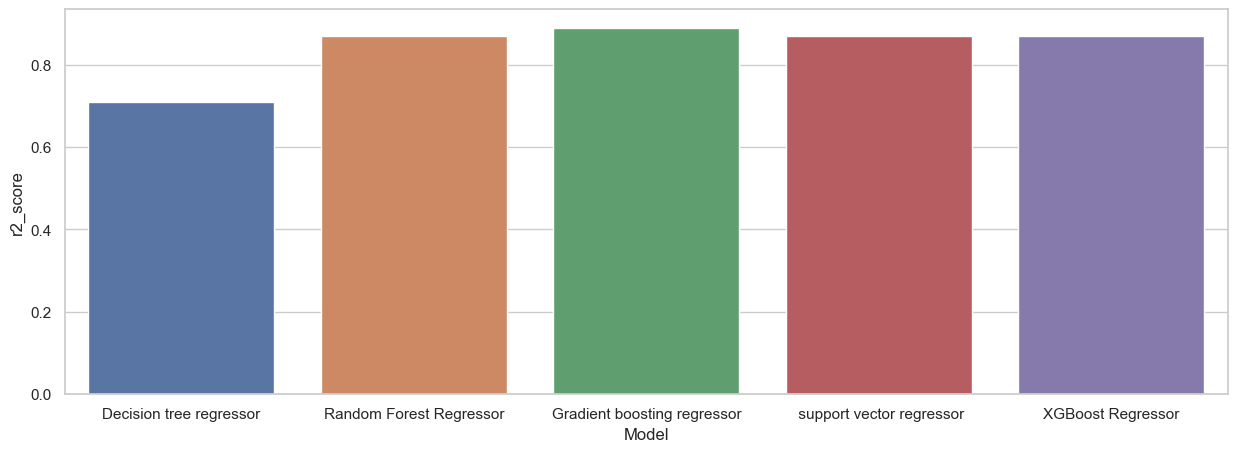

In [96]:
plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
ax=sns.barplot(x='Model',y='r2_score',data=m_report)

* Based on the observation above ,we can conclude that the all regressor model are performing best on this data set.

## Deployment 

In [97]:
# save the model to disk
import pickle

filename = 'finalized_model.model'
pickle.dump(gb, open(filename,'wb'))

In [98]:
# Load the model from disk
import pickle

filename = 'finalized_model.model'

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8908084220852541


### Challenges Faced 
* 1) Data Quality and Quantity: Obtaining high-quality data with sufficient quantity can be challenging. Incomplete or noisy data, missing values, and outliers can affect the performance of the regression model.
* 2) Feature Engineering: Identifying and engineering relevant features from the dataset can be complex. It involves selecting the most predictive features, handling categorical variables, dealing with multicollinearity, and creating new features through transformations or interactions.
* 3) Model Selection and Tuning: Choosing the right regression algorithm and tuning its hyperparameters for optimal performance can be challenging. It requires experimenting with different regression models (e.g., linear regression, decision trees, ensemble methods) and conducting hyperparameter tuning using techniques like grid search or randomized search.

## Conclusion:
* This project involves various challenges and considerations, but with careful planning and execution, it can yield accurate and reliable predictions. 
* Data Quality and Feature Engineering: High-quality data and effective feature engineering are crucial for building a successful regression model. 
* It's essential to handle missing values, outliers, and categorical variables appropriately, as well as engineer informative features that capture the underlying patterns in the data.
*  Experimenting with different regression algorithms and tuning their hyperparameters is essential to find the optimal model for the prediction task. Techniques like grid search or randomized search can help identify the best-performing model configuration.

Accuracy of  Decision Tree Regressor : 0.71

Accuracy of Random forest regressor  : 0.87

Accuracy of Gradient boosting regressor : 0.89

Accuracy of support vector regressor after hyper parameter tuning : 0.87

Accuracy of XGBoost regressor  : 0.87
